### Условие
Это задание от команды [EXPF](https://expf.ru/). Компания консультирует и обучает команды в области A/B-экспериментов, анализа данных, разработки и оптимизации метрик.

Итак, вы продуктовый аналитик в крупной и известной компании. Ваша задача проверить гипотезу используя знания о статистике. Поехали!

**Главная страница Яндекса.** Поменяли местами иконки "Маркет" и "Карты" над строкой поиска. Необходимо проверить, повлияло ли изменение и стали ли пользователи чаще кликать на иконку "Маркета" по возвращению на сайт.

Формула кликабельности иконки маркета:

$$\text{CTR} = \frac{\sum_{c_{i} \in C} \text{Clicks }}{\sum_{s_{i} \in S} \text{Sessions } }$$

### Описание колонок

- `user_id` – идентификатор пользователя
- `session_id` – идентификатор сессии
- `click_id` – идентификатор клика
- `experimentVariant` – вариант эксперимента

### Задача

1. Проверьте гипотезу о кликабельности иконки с помощью метрики CTR (click-through-rate)
2. Напишите выводы, которые можно сделать на основе анализа результатов

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [2]:
url = '/Users/tsyrdugar/Downloads/case_ctr.csv'

In [3]:
df = pd.read_csv(url, sep=';', index_col=0)

In [4]:
df.head()

,user_id,session_id,click_id,experimentVariant
1,4299b8c9c50c3e4e8a067f448426463e,08f9c3b0e2ff8da7bad6cc200fa735a2,56bcee80ce68ddc58c178a63288965b2,1
2,863829e0fc8e0dcd88f44c6a63db836a,d0ebf6ddaa8702e6de4e46854a1136ff,b209c6b14e91606a99d637ff6eb74cc6,1
3,640af3312483bea44b8159a8caaf0b3d,838c4a718830b5f1ac7be5e70745ff47,3f3d510c709ae5d9bae0331fcf776f3a,1
4,43de481cae63944b81db6fd5567a12bb,8f36aead1ceafb3e67f9957a7765549e,da73306047217a73a6ee0ea7477f2ad7,0
5,b84dd1a6c3df2e08eb7bef496cdf6d39,09799cdf1394b0e4b86ace899b7f218e,6e4b93932be600a5536c291888996037,1


In [6]:
df.shape

(10000, 4)

In [9]:
df.duplicated().sum()

467

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            10000 non-null  object
 1   session_id         10000 non-null  object
 2   click_id           7655 non-null   object
 3   experimentVariant  10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


In [11]:
df.isna().sum()

user_id                 0
session_id              0
click_id             2345
experimentVariant       0
dtype: int64

In [12]:
df.dtypes

user_id              object
session_id           object
click_id             object
experimentVariant     int64
dtype: object

In [13]:
# Количество уникальных юзеров
df['user_id'].nunique()

2246

In [86]:
df.groupby('experimentVariant') \
    .agg({'user_id':'count'})

,user_id
experimentVariant,
0,5112
1,4888


In [41]:
# К-во кликов и сессий по юзерам в контрольной группе
control = df[df['experimentVariant'] == 0] \
    .groupby('user_id', as_index=False) \
    .agg({'click_id':'count', 'session_id':'count'}) \
    .rename({'click_id':'clicks', 'session_id':'sessions'}, axis=1)

In [42]:
# К-во кликов и сессий по юзерам в тестовой группе
test = df[df['experimentVariant'] == 1] \
    .groupby('user_id', as_index=False) \
    .agg({'click_id':'count', 'session_id':'count'}) \
    .rename({'click_id':'clicks', 'session_id':'sessions'}, axis=1)

In [102]:
# Размер выборки в контроле
control.shape

(1129, 4)

In [103]:
# Размер выборки в тесте
test.shape

(1117, 4)

In [63]:
# CTR в контроле
control = control.assign(ctr = control['clicks']/control['sessions'])

In [64]:
# CTR в тесте
test = test.assign(ctr = test['clicks']/test['sessions'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

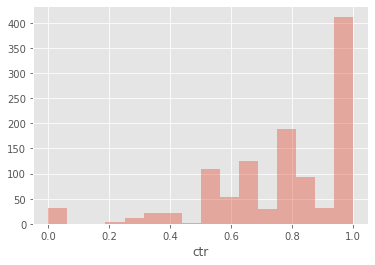

In [95]:
# Распределение CTR в контроле 
sns.distplot(control.ctr, kde=False)

<AxesSubplot:xlabel='ctr'>

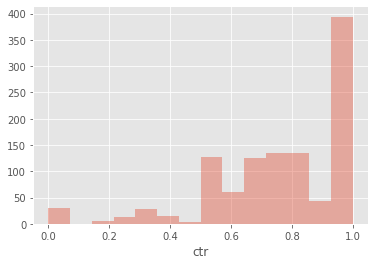

In [96]:
# Распределение CTR в тесте 
sns.distplot(test.ctr, kde=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


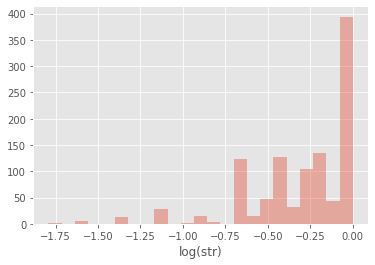

In [136]:
# Попытка логарифмировать ctr не привела к тому, что распределение напоминало бы нормальное
sns.distplot(np.log(test[test['ctr'] > 0]['ctr']), kde=False);
plt.xlabel('log(str)');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'log(str)')

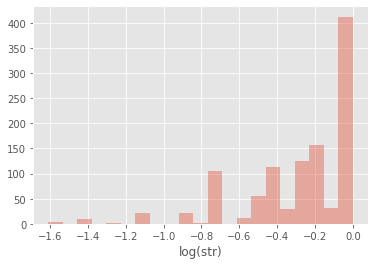

In [137]:
# Попытка логарифмировать ctr не привела к тому, что распределение напоминало бы нормальное
sns.distplot(np.log(control[control['ctr'] > 0]['ctr']), kde=False)
plt.xlabel('log(str)')

**Описательные статистики clicks, sessions и CTR.**

*Медиана в контроле*

In [99]:
control['sessions'].median()

4.0

In [100]:
control['clicks'].median()

3.0

In [101]:
control['ctr'].median()

0.8

*Медиана в тесте*

In [104]:
test['sessions'].median()

4.0

In [105]:
test['clicks'].median()

3.0

In [106]:
test['ctr'].median()

0.8

## Тестирование гипотез

***H0: Различий в тестовой и контрольной группе нет***

***H1: Различия есть***

*Тест Шапиро-Уилки для проверки на нормальность*

In [111]:
statistic, p_value = stats.shapiro(control['ctr'])
alpha = 0.05
if p_value > alpha:
    print(f"при p-value, равным {p_value}, распределение нормальное")
else:
    print(f"при p-value, равным {p_value}, распределение НЕ нормальное")

при p-value, равным 4.128236007969184e-31, распределение НЕ нормальное


*Поскольку нашей основой метрикой А/B теста является CTR и распределение CTR является ненормальным, 

воспользуемся U-тестом Манна-Уитни*

In [113]:
statistic, p_value = stats.mannwhitneyu(control['ctr'], test['ctr'])
alpha = 0.05
if p_value > alpha:
    print(f"при p-value, равным {p_value}, Отклонить H0 не можем")
else:
    print(f"при p-value, равным {p_value}, Можем отклонить H0")

при p-value, равным 0.07842795146979505, Отклонить H0 не можем


*T-тест Стьюдента для проверки средних*

In [114]:
statistic, p_value = stats.ttest_ind(control['ctr'], test['ctr'])
alpha = 0.05
if p_value > alpha:
    print(f"при p-value, равным {p_value}, Отклонить H0 не можем")
else:
    print(f"при p-value, равным {p_value}, Можем отклонить H0")

при p-value, равным 0.16567637669761343, Отклонить H0 не можем


*Бутстрап для средних в двух группах*

In [82]:
#function for MEAN
def get_bootstap_mean(
    data_column_1, 
    data_column_2,
    boot_it = 1000,
    statistic = np.mean, 
    bootstrap_conf_level = 0.95):
    
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    
    for i in tqdm(range(boot_it)):
        sample_1 = data_column_1.sample(boot_len, replace = True).values
        sample_2 = data_column_2.sample(boot_len, replace = True).values
        
        boot_data.append(statistic(sample_1 - sample_2))
    
    pd_boot_data = pd.DataFrame(boot_data)
    
    left_quantile = (1 - bootstrap_conf_level) / 2
    right_quantile = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quantile, right_quantile])
    
    p_1 = stats.norm.cdf(x = 0, loc = np.mean(boot_data), scale = np.std(boot_data))
    p_2 = stats.norm.cdf(x = 0, loc = - np.mean(boot_data), scale = np.std(boot_data))
    
    p_value = min(p_1, p_2) * 2

    
    
    return {'ci' : ci, 
          'p_value' : p_value}

In [125]:
get_bootstap_mean(test['ctr'], control['ctr'])

  0%|          | 0/1000 [00:00<?, ?it/s]

{'ci':               0
 0.025 -0.034109
 0.975  0.005279,
 'p_value': 0.1666581338861456}

**Вывод:** Все три теста показали, что статистически значимых различий в двух группах по метрике CTR нет.

Означает ли это, что в реальности различий нет? Может быть, мы совершаем ошибку II рода? Различия есть, но обнаружить их мы не смогли?